# Importing required Liberaries

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,classification_report,confusion_matrix

# DATA COLLECTION

In [3]:
df=pd.read_csv("loan_approval_dataset.csv")

# DATA PREPROCESSING

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.shape

(4269, 13)

In [8]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
df[" loan_status"].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [12]:
df.size

55497

### DATA CLEANING

In [13]:
df.drop(['loan_id'],axis=1,inplace=True)

In [14]:
df.columns = df.columns.str.replace(' ', '') 

In [15]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## EDA

<Axes: >

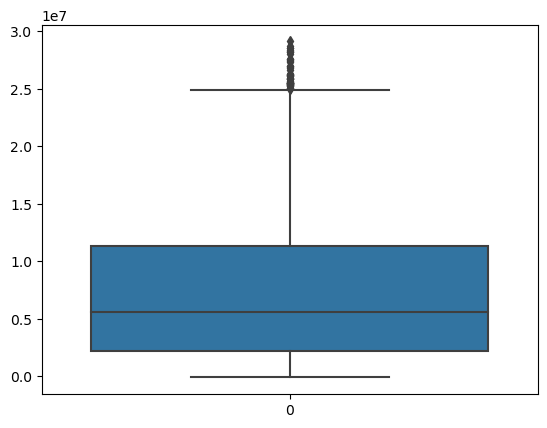

In [16]:
sns.boxplot(df['residential_assets_value'])

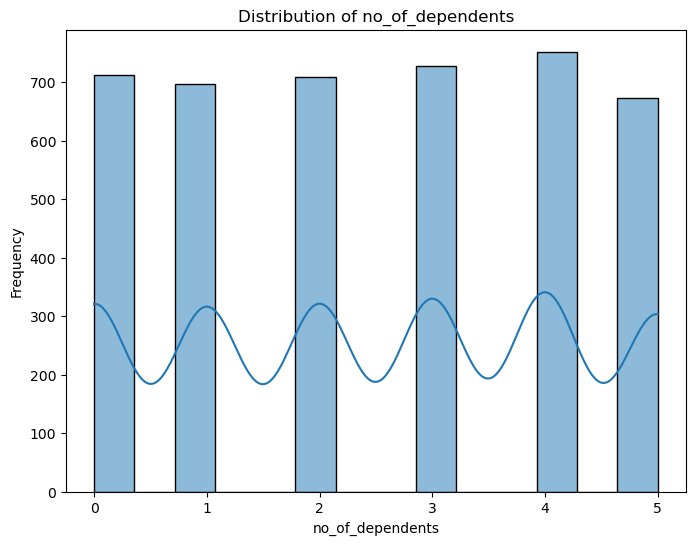

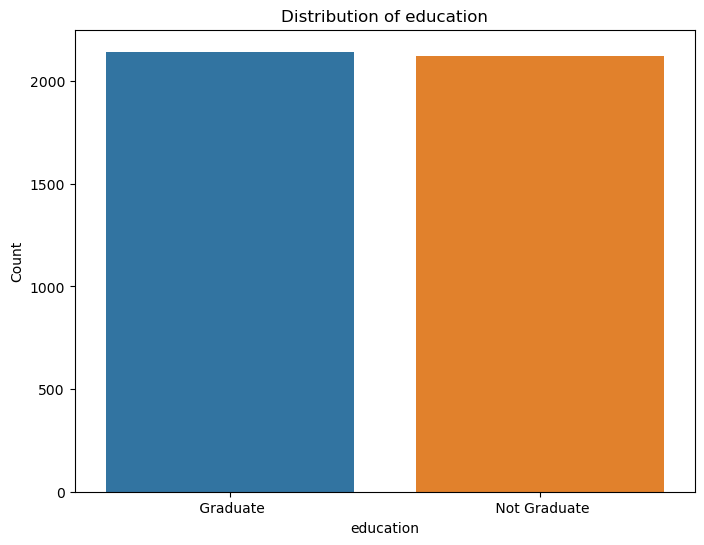

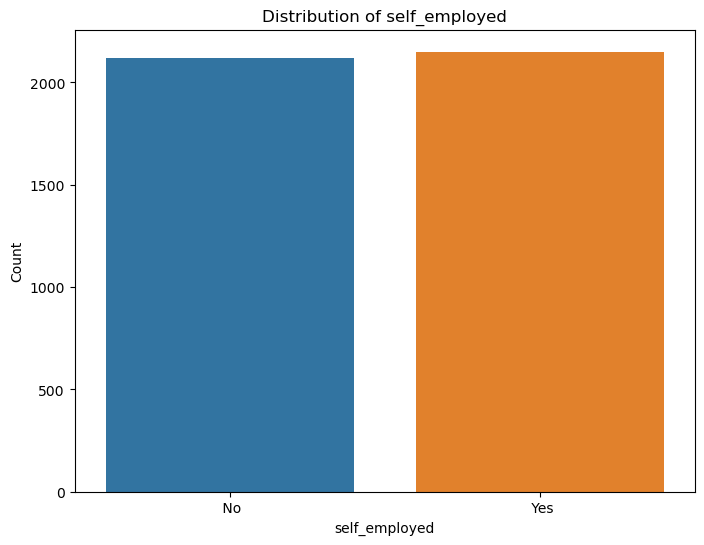

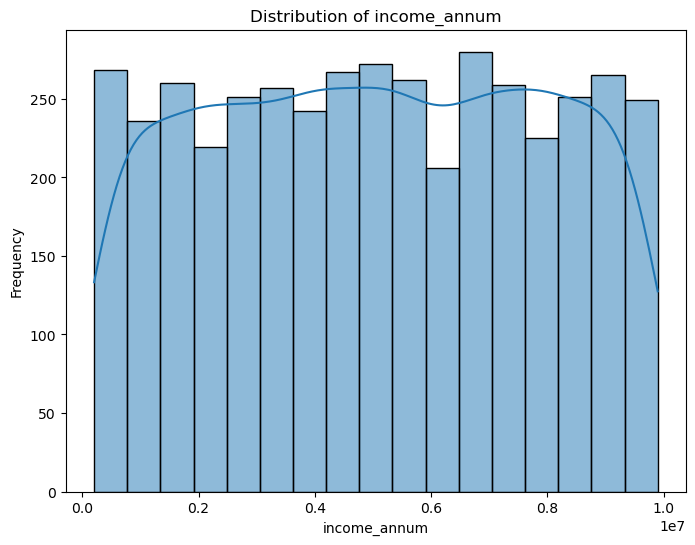

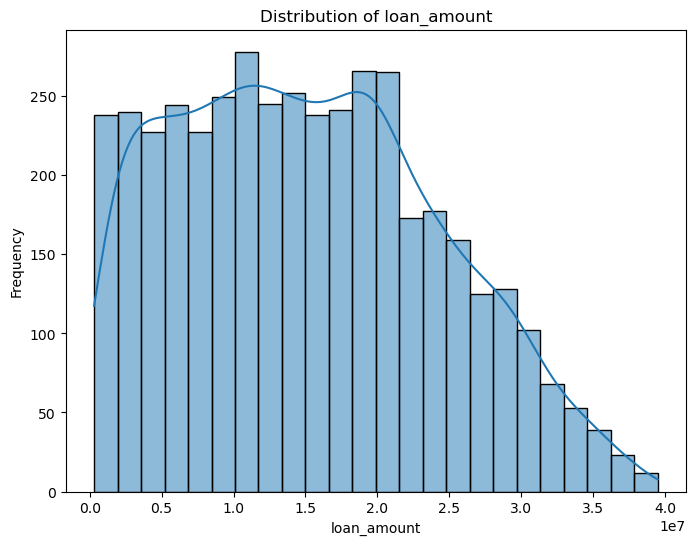

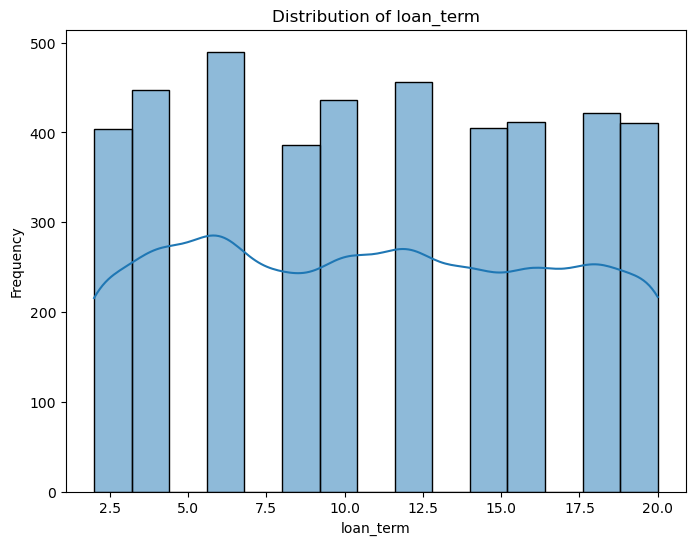

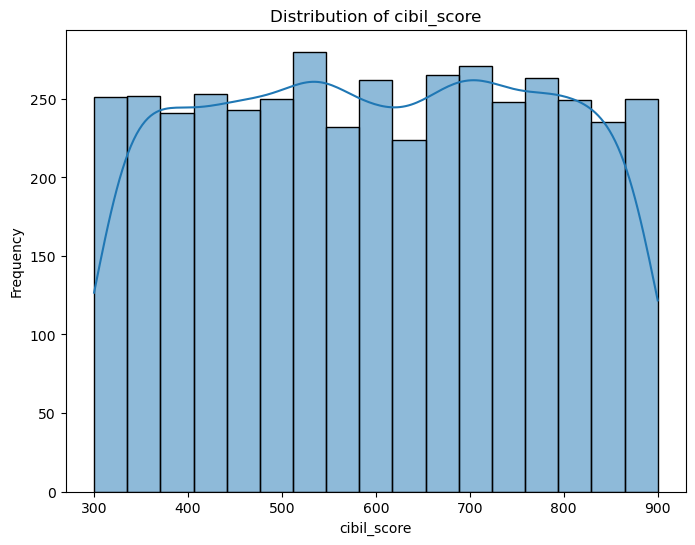

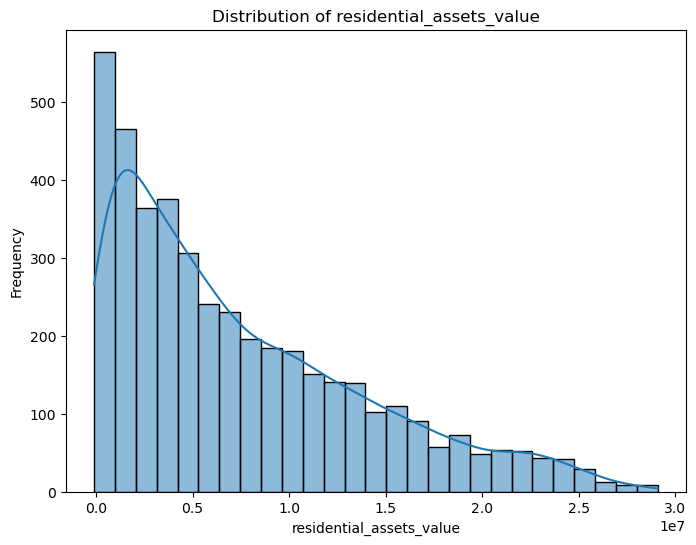

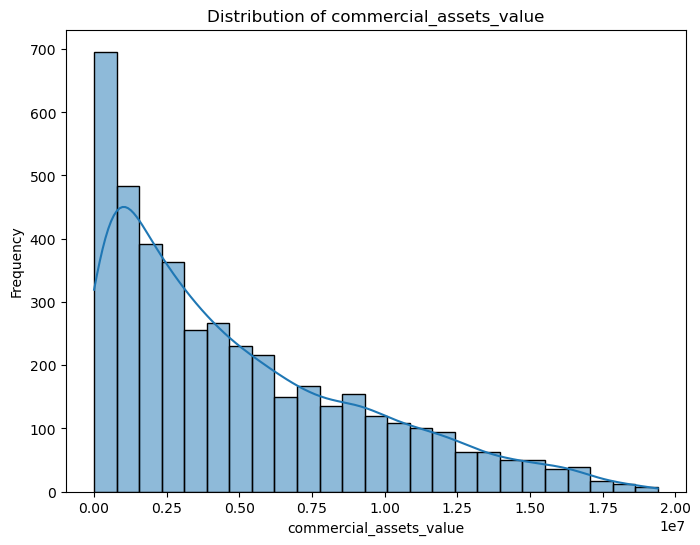

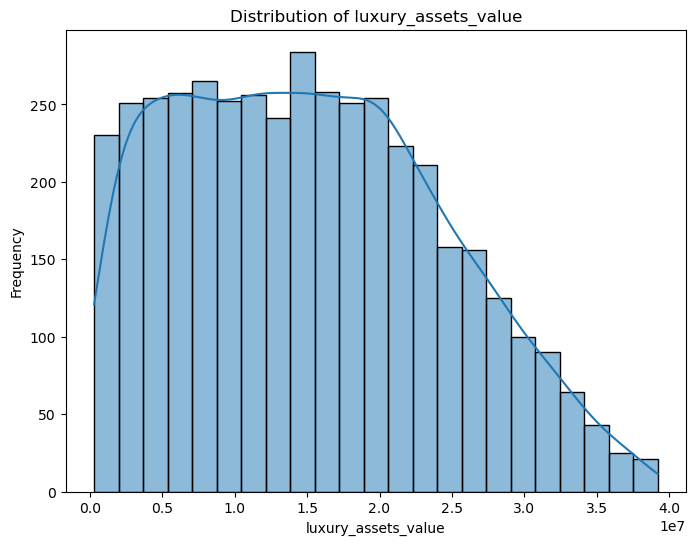

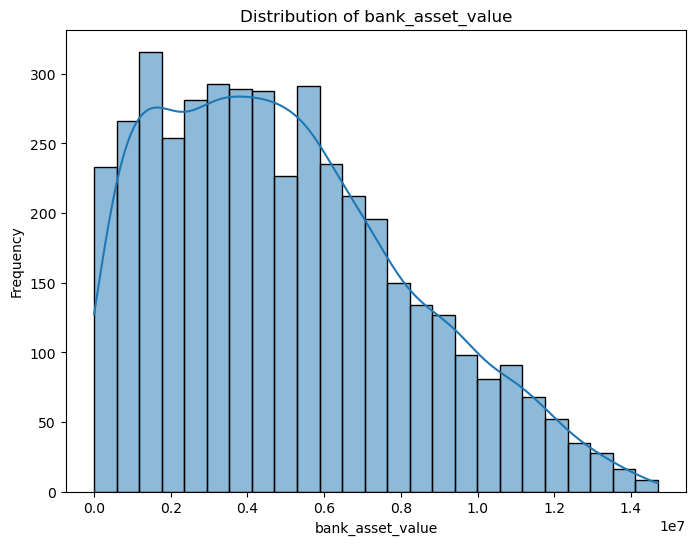

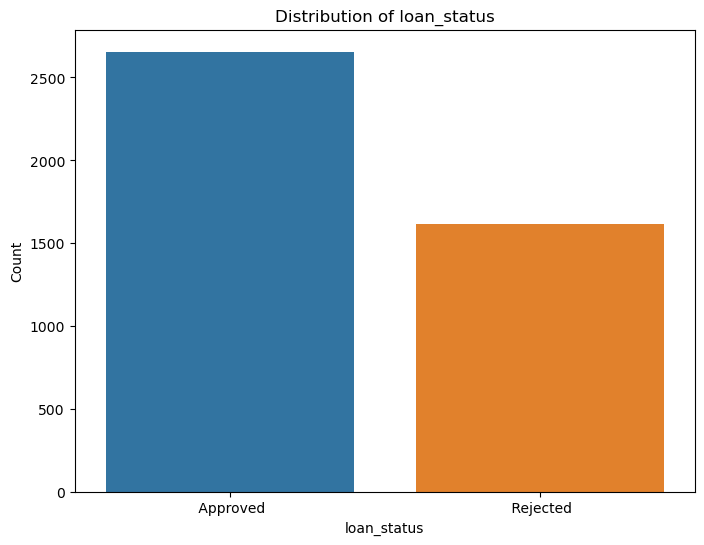

In [17]:
def plot_distribution(data, feature):
    plt.figure(figsize=(8, 6))
    
    if data[feature].dtype == 'object':  
        sns.countplot(x=feature, data=data)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel('Count')
    else:
        sns.histplot(data[feature], kde=True) 
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.show()

features = [ 
    'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 
    'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 
    'luxury_assets_value', 'bank_asset_value', 'loan_status'
]

for feature in features:
    plot_distribution(df, feature)

In [18]:
# Outlier detection and handling:

def remove_outliers(df):
    df_clean = df.copy()
    
    for column in df_clean.columns:
        if pd.api.types.is_numeric_dtype(df_clean[column]):
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean
remove_outliers(df)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [19]:
df_clean=remove_outliers(df)

In [20]:
df_clean

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## ENCODING CATEGORICAL VARIABLES 

In [21]:
categorical_features = ['education', 'self_employed', 'loan_status']
categorical_df = df[categorical_features]

In [22]:
def encoder(dataframe, features):
    encoder = OneHotEncoder(drop='first',sparse_output=False)
    encoded_data = encoder.fit_transform(dataframe)
    encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
    return encoded_dataframe

In [23]:
encoded_df = encoder(categorical_df, categorical_features)
encoded_df.head(2)

,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,0.0,0.0,0.0
1,1.0,1.0,1.0


In [24]:
# Make a copy from original df and assign it to df_w_encode
df_w_encode = df_clean.copy()
# Replace catergorical data with encoding data from encoded_df
df_w_encode[categorical_features] = encoded_df

In [25]:
df_w_encode

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0
5,0,0.0,1.0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0.0,1.0,1000000,2300000,12,317,2800000,500000,3300000,800000,1.0
4265,0,1.0,1.0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0.0
4266,2,1.0,0.0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1.0
4267,1,1.0,0.0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0.0


In [26]:
df_w_encode.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

# TRAIN_TEST_SPLIT

In [27]:
x = df_w_encode.drop('loan_status', axis=1)
y = df_w_encode['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3338, 11) (835, 11) (3338,) (835,)


## FEATURE SCALING

In [28]:
stand_scaler = StandardScaler()
stand_scaler.fit(x_train)

StandardScaler()

In [29]:
x_train = stand_scaler.transform(x_train)
x_test_stand = stand_scaler.transform(x_test)

# MODEL FITTING

## Model 1: Logistic Regression

In [30]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(x_test_stand)

In [32]:
y_pred_proba = clf.predict_proba(x_test_stand)[:, 1]
y_pred_proba

array([3.20176733e-03, 9.83746130e-01, 1.79300273e-03, 1.29203630e-03,
       2.85758240e-02, 6.88870244e-03, 8.68768276e-01, 9.48683608e-01,
       1.61321186e-01, 7.16736984e-01, 4.81450809e-04, 1.10895591e-02,
       6.33083040e-03, 5.21027517e-03, 1.42041919e-04, 3.61542720e-03,
       5.69105481e-01, 9.88597132e-01, 3.13654708e-01, 7.16784554e-01,
       2.93299442e-01, 9.77091883e-01, 9.15175296e-01, 3.19425553e-01,
       9.64202398e-01, 9.55783212e-01, 1.28003360e-02, 2.76785521e-01,
       7.38784865e-01, 4.87588181e-01, 2.89992478e-01, 9.89734838e-01,
       8.10006009e-01, 7.97050423e-01, 9.89658413e-01, 4.51825630e-02,
       1.64092718e-02, 1.82983506e-02, 4.21224953e-04, 7.98930521e-01,
       2.98926129e-03, 9.85210834e-01, 7.96978931e-02, 1.36485513e-01,
       6.96222664e-01, 5.69273916e-04, 7.15496767e-03, 9.67608462e-01,
       5.13859011e-01, 4.68187154e-03, 1.14884847e-01, 4.09435449e-01,
       8.68378712e-01, 8.87006191e-01, 9.92194073e-01, 4.32579238e-01,
      

### MODEL EVALUATION

In [33]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9150
Precision: 0.8885
Recall: 0.8857
F1 Score: 0.8871
ROC-AUC: 0.9716

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       520
         1.0       0.89      0.89      0.89       315

    accuracy                           0.91       835
   macro avg       0.91      0.91      0.91       835
weighted avg       0.91      0.91      0.91       835


Confusion Matrix:
[[485  35]
 [ 36 279]]


## Model 2: Random Forest Classifier

In [39]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test_stand)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Precision: 0.9841
Recall: 0.9841
F1 Score: 0.9841
ROC-AUC: 0.9716

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       520
         1.0       0.98      0.98      0.98       315

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835


Confusion Matrix:
[[515   5]
 [  5 310]]


In [69]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
 
# Predict using the SVM model
y_pred = model.predict(x_test_stand)
 
# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of SVM:", accuracy ,"%")

Accuracy of SVM: 92.6946107784431 %


In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
Precision: 0.8920
Recall: 0.9175
F1 Score: 0.9045
ROC-AUC: 0.9716

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       520
         1.0       0.89      0.92      0.90       315

    accuracy                           0.93       835
   macro avg       0.92      0.93      0.92       835
weighted avg       0.93      0.93      0.93       835


Confusion Matrix:
[[485  35]
 [ 26 289]]
